In [27]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

We will now explore relationship between social learners and their opinions aggregated at the state level. I will examine vaccination rate(atleast one dose) as of april,23,2023 with social learner proportion. The data for vaccination rate was retrieved from https://www.statista.com/statistics/1202065/population-with-covid-vaccine-by-state-us/. 

In [2]:
vaccine_df = pd.read_csv('vaccines.csv')
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           59 non-null     object 
 1   State Code      59 non-null     object 
 2   vaccine_1_dose  59 non-null     float64
 3   Vaccine_rate    59 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.0+ KB


In [3]:
vaccine_df = vaccine_df.rename(columns={"State Code": "Code"})
vaccine_df.drop(columns=['State','vaccine_1_dose'],inplace=True)
vaccine_df.head()

,Code,Vaccine_rate
0,RI,0.95
1,AS,0.95
2,DC,0.95
3,MA,0.95
4,VT,0.95


In [4]:
vaccine_df.describe()

,Vaccine_rate
count,59.000000
mean,0.799068
std,0.116171
min,0.573000
25%,0.697500
50%,0.791000
75%,0.911500
max,0.950000


In [5]:
collective_df = pd.read_csv('state_ind_col.csv')
collective_df.head()

,Rank,State,Index,State.1
0,1,HI,91,Hawaii
1,2,LA,72,Louisiana
2,3,SC,70,South Carolina
3,4,MS,64,Mississippi
4,5,MD,63,Maryland


In [6]:
collective_df.drop(columns=['Rank','State.1'],inplace=True)
collective_df.head()

,State,Index
0,HI,91
1,LA,72
2,SC,70
3,MS,64
4,MD,63


In [7]:
collective_df.tail()

,State,Index
45,SD,36
46,WY,35
47,NE,35
48,OR,33
49,MT,31


In [8]:
collective_df.describe()

,Index
count,50.000000
mean,50.080000
std,11.336846
min,31.000000
25%,42.000000
50%,49.500000
75%,56.750000
max,91.000000


In [9]:
collective_df = collective_df.rename(columns={"State": "Code"})
collective_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Code    50 non-null     object
 1   Index   50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


**Index** - Social Learner Index: a higher value represents higher value of collectivism.  
**Vaccine_rate** - atleast 1 dose COVID vaccine registered to the said proportion of the state population.  

In [10]:
merged_df = collective_df.merge(vaccine_df,on='Code',how='outer')
merged_df = merged_df[~merged_df.Index.isna()]
merged_df

,Code,Index,Vaccine_rate
0,HI,91.0,0.916
1,LA,72.0,0.629
2,SC,70.0,0.712
3,MS,64.0,0.618
4,MD,63.0,0.920
5,UT,61.0,0.755
6,VA,60.0,0.913
7,GA,60.0,0.686
8,CA,60.0,0.850
9,NJ,59.0,0.949


In [11]:
# just dividing the social learner index by 100 instead of normalizing it.
merged_df.Index = merged_df.Index / 100
merged_df.head()

,Code,Index,Vaccine_rate
0,HI,0.91,0.916
1,LA,0.72,0.629
2,SC,0.70,0.712
3,MS,0.64,0.618
4,MD,0.63,0.920


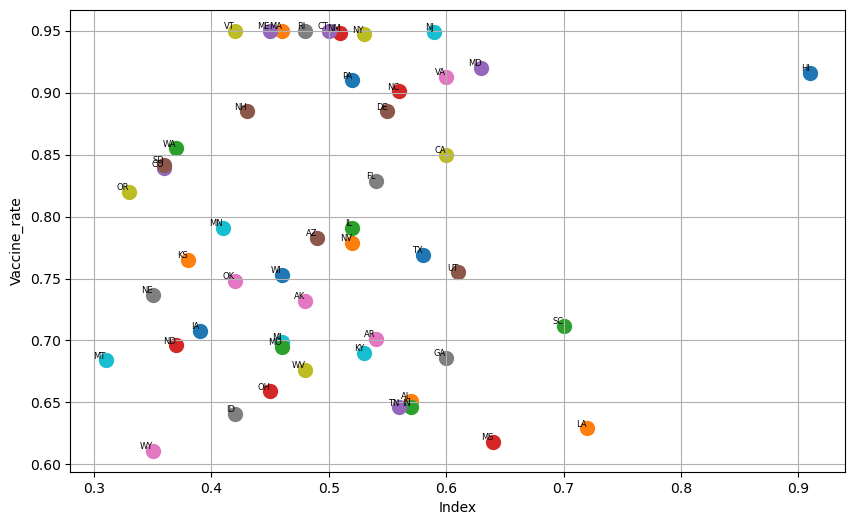

In [12]:
# Scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['Index'], row['Vaccine_rate'], label=row['Code'],s = 100)
    plt.text(row['Index'], row['Vaccine_rate'], row['Code'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('Index')
plt.ylabel('Vaccine_rate')



# Show the plot
plt.grid()

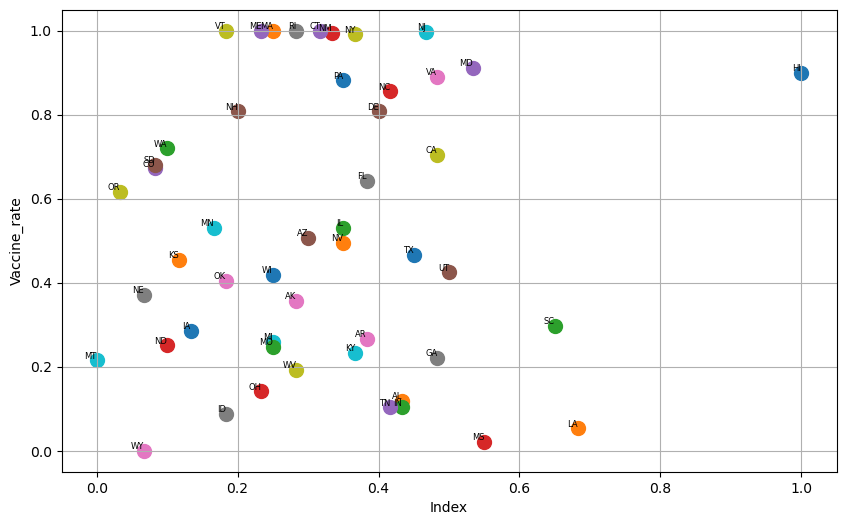

In [13]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'Index' and 'Vaccine_rate' columns
# merged_df[['Index', 'Vaccine_rate']] = scaler.fit_transform(merged_df[['Index', 'Vaccine_rate']])
merged_df[['Index', 'Vaccine_rate']] = scaler.fit_transform(merged_df[['Index', 'Vaccine_rate']])
plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['Index'], row['Vaccine_rate'], label=row['Code'],s = 100)
    plt.text(row['Index'], row['Vaccine_rate'], row['Code'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('Index')
plt.ylabel('Vaccine_rate')



# Show the plot
plt.grid()

Experiments with full vaccine - percentage of people fully vaccinated

In [14]:
fullvaccine_df = pd.read_csv('full_vaccine.csv')
fullvaccine_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State Code         59 non-null     object 
 1   vaccine            59 non-null     float64
 2   full_vaccine_rate  59 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [15]:
fullvaccine_df = fullvaccine_df.rename(columns={"State Code": "Code"})
fullvaccine_df.drop(columns='vaccine',inplace=True)
fullvaccine_df.head()


,Code,full_vaccine_rate
0,RI,0.880
1,AS,0.896
2,DC,0.912
3,MA,0.845
4,VT,0.860


In [16]:
merged_df = merged_df.merge(fullvaccine_df,on='Code',how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               50 non-null     object 
 1   Index              50 non-null     float64
 2   Vaccine_rate       50 non-null     float64
 3   full_vaccine_rate  50 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.0+ KB


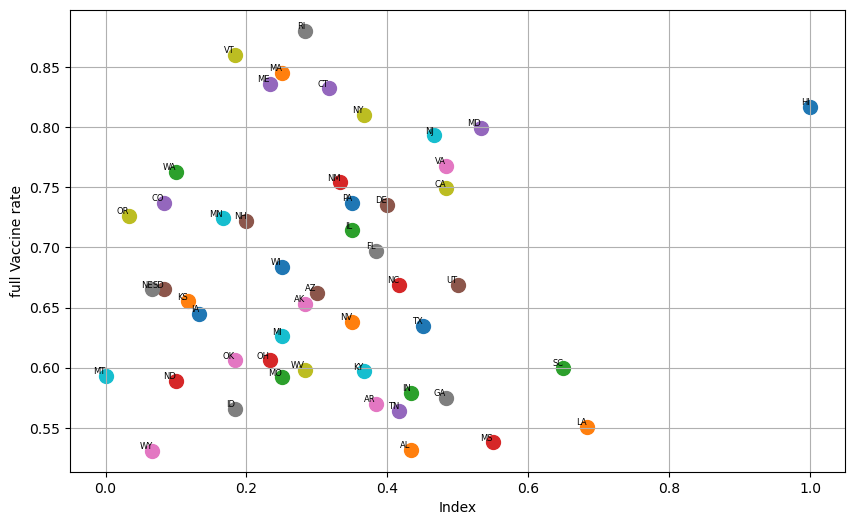

In [17]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['Index'], row['full_vaccine_rate'], label=row['Code'],s = 100)
    plt.text(row['Index'], row['full_vaccine_rate'], row['Code'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('Index')
plt.ylabel('full Vaccine rate')



# Show the plot
plt.grid()

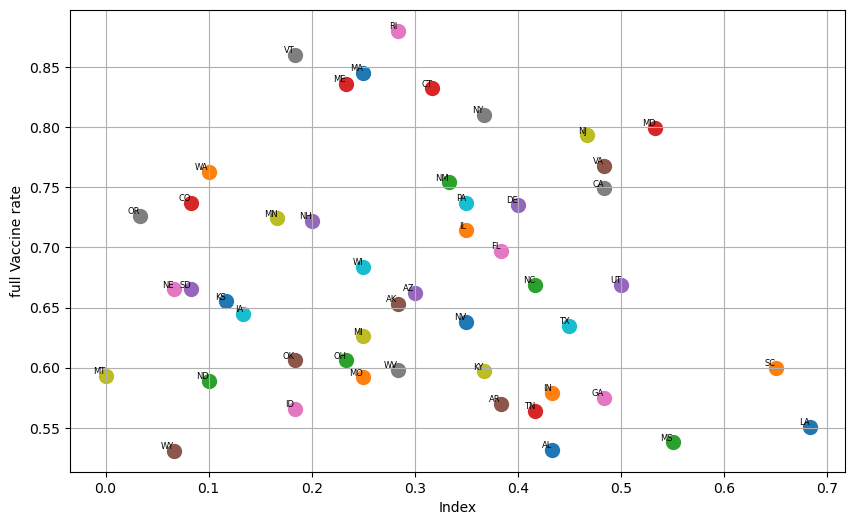

In [18]:
#removing Hawaii
merged_df = merged_df[merged_df.Code != 'HI']
plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['Index'], row['full_vaccine_rate'], label=row['Code'],s = 100)
    plt.text(row['Index'], row['full_vaccine_rate'], row['Code'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('Index')
plt.ylabel('full Vaccine rate')



# Show the plot
plt.grid()

In [20]:
prez_election_df = pd.read_csv('prez_rate.csv')
prez_election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           51 non-null     object 
 1   prez_vote_rate  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 944.0+ bytes


President vote rate is the proportion of people who voted for the president in the 2000 elections by state.

In [22]:
prez_election_df.rename(columns={'State':'Code'}, inplace=True)
prez_election_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            51 non-null     object 
 1   prez_vote_rate  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [23]:
merged_df = merged_df.merge(prez_election_df,how='outer',on='Code')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               51 non-null     object 
 1   Index              49 non-null     float64
 2   Vaccine_rate       49 non-null     float64
 3   full_vaccine_rate  49 non-null     float64
 4   prez_vote_rate     51 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.4+ KB


In [24]:
merged_df[merged_df.Index.isna()]

,Code,Index,Vaccine_rate,full_vaccine_rate,prez_vote_rate
49,DC,NaN,NaN,NaN,0.090
50,HI,NaN,NaN,NaN,0.375


In [25]:
merged_df = merged_df[~merged_df.Index.isna()]
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               49 non-null     object 
 1   Index              49 non-null     float64
 2   Vaccine_rate       49 non-null     float64
 3   full_vaccine_rate  49 non-null     float64
 4   prez_vote_rate     49 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


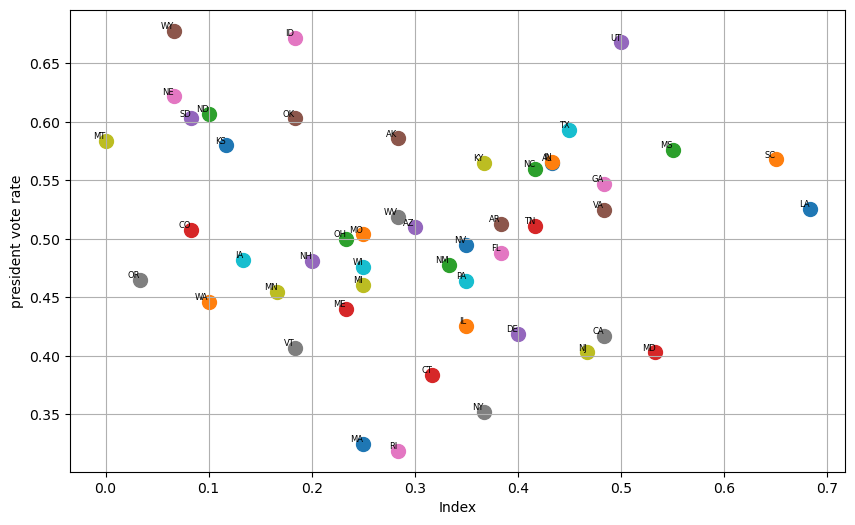

In [26]:

plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with country names as labels
for i, row in merged_df.iterrows():
    plt.scatter(row['Index'], row['prez_vote_rate'], label=row['Code'],s = 100)
    plt.text(row['Index'], row['prez_vote_rate'], row['Code'], fontsize=6, ha='right', va='bottom')

# Label axes
plt.xlabel('Index')
plt.ylabel('president vote rate')



# Show the plot
plt.grid()

**Model Selection using BIC and different Regression models**

In [28]:



# Extract the independent variable 'index' and the dependent variable 'vaccine_rate'
X =merged_df['Index']
y = merged_df['full_vaccine_rate']

# Create a DataFrame to store the results
results = []

# Linear Regression
X_linear = sm.add_constant(X)
model_linear = sm.OLS(y, X_linear).fit()
log_likelihood_linear = model_linear.llf
num_params_linear = model_linear.df_model + 1
bic_linear = -2 * log_likelihood_linear + num_params_linear * np.log(len(y))
results.append(('Linear Regression', bic_linear))

# Polynomial Regression (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X.values.reshape(-1, 1))
model_poly = sm.OLS(y, X_poly).fit()
log_likelihood_poly = model_poly.llf
num_params_poly = model_poly.df_model + 1
bic_poly = -2 * log_likelihood_poly + num_params_poly * np.log(len(y))
results.append(('Polynomial Regression (Degree 2)', bic_poly))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X.values.reshape(-1, 1), y)
y_pred_ridge = ridge.predict(X.values.reshape(-1, 1))
residuals_ridge = y - y_pred_ridge
log_likelihood_ridge = -0.5 * len(y) * np.log(np.mean(residuals_ridge**2))
num_params_ridge = 2  # Two parameters: intercept and slope
bic_ridge = -2 * log_likelihood_ridge + num_params_ridge * np.log(len(y))
results.append(('Ridge Regression', bic_ridge))

# Display BIC scores for all models
results_df = pd.DataFrame(results, columns=['Model', 'BIC'])
print(results_df)


                              Model         BIC
0                 Linear Regression  -84.775125
1  Polynomial Regression (Degree 2)  -84.682874
2                  Ridge Regression -223.753978


In [29]:

X =merged_df['Index']
y = merged_df['prez_vote_rate']

# Create a DataFrame to store the results
results = []

# Linear Regression
X_linear = sm.add_constant(X)
model_linear = sm.OLS(y, X_linear).fit()
log_likelihood_linear = model_linear.llf
num_params_linear = model_linear.df_model + 1
bic_linear = -2 * log_likelihood_linear + num_params_linear * np.log(len(y))
results.append(('Linear Regression', bic_linear))

# Polynomial Regression (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X.values.reshape(-1, 1))
model_poly = sm.OLS(y, X_poly).fit()
log_likelihood_poly = model_poly.llf
num_params_poly = model_poly.df_model + 1
bic_poly = -2 * log_likelihood_poly + num_params_poly * np.log(len(y))
results.append(('Polynomial Regression (Degree 2)', bic_poly))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X.values.reshape(-1, 1), y)
y_pred_ridge = ridge.predict(X.values.reshape(-1, 1))
residuals_ridge = y - y_pred_ridge
log_likelihood_ridge = -0.5 * len(y) * np.log(np.mean(residuals_ridge**2))
num_params_ridge = 2  # Two parameters: intercept and slope
bic_ridge = -2 * log_likelihood_ridge + num_params_ridge * np.log(len(y))
results.append(('Ridge Regression', bic_ridge))

# Display BIC scores for all models
results_df = pd.DataFrame(results, columns=['Model', 'BIC'])
print(results_df)

                              Model         BIC
0                 Linear Regression  -95.103787
1  Polynomial Regression (Degree 2)  -97.381528
2                  Ridge Regression -234.065876
